# 04_prediction_generation.ipynb

## Notebook Purpose
This notebook is designed to generate future price predictions using the trained machine learning models. It will load the trained models, apply them to the data, and save the predictions.

## Instructions
1. **Import Necessary Libraries**:
   - Import `pandas` for data manipulation.
   - Import `joblib` to load the trained model.
   - Import functions from `models.py` for making predictions.

2. **Load Preprocessed Data and Model**:
   - Load the preprocessed CSV file created in the first notebook.
   - Load the trained model from the previous notebook.

3. **Generate Predictions**:
   - Use the `make_prediction` function to generate predictions based on the trained model.
   - Apply the model to the data to predict future prices.

4. **Save Predictions**:
   - Save the generated predictions to a new CSV file.

5. **Review Predictions**:
   - Display the first few rows of the predictions to ensure they look correct.

## Example Code
```python
# Import necessary libraries
import pandas as pd
import joblib
from scripts.models import make_prediction

# Load preprocessed data and model
data_path = 'data/historical_data/btc_usd_preprocessed.csv'  # Update this path based on the selected cryptocurrency
data = pd.read_csv(data_path, parse_dates=['time'], index_col='time')
model = joblib.load('models/trained_model.pkl')

# Make predictions
predictions = make_prediction(model, data)

# Save predictions
results = data[['close']].copy()
results['Predictions'] = predictions
results.to_csv('results/predictions.csv')

# Display predictions
results.head()


In [1]:
# Cell 1: Import necessary libraries and verify
try:
    import pandas as pd
    import joblib
    import sys
    import os
    import matplotlib.pyplot as plt
    
    # Add the scripts directory to the Python path if needed
    current_dir = os.getcwd()
    scripts_dir = os.path.join(current_dir, '..', 'scripts')
    if scripts_dir not in sys.path:
        sys.path.append(scripts_dir)

    from models import make_prediction
    print("Libraries imported successfully.")
except ImportError as e:
    print(f"Error importing libraries: {e}")


Libraries imported successfully.


In [2]:
# Cell 2: Load preprocessed data and models
data_paths = {
    'BTC': '../data/cleaned_data/BTC_cleaned.csv',
    'ETH': '../data/cleaned_data/ETH_cleaned.csv',
    'SOL': '../data/cleaned_data/SOL_cleaned.csv'
}

model_paths = {
    'BTC': '../models/BTC_trained_model.pkl',
    'ETH': '../models/ETH_trained_model.pkl',
    'SOL': '../models/SOL_trained_model.pkl'
}

crypto_data = {crypto: pd.read_csv(path, parse_dates=['Date'], index_col='Date') for crypto, path in data_paths.items()}
crypto_models = {crypto: joblib.load(path) for crypto, path in model_paths.items()}

# Verify loaded data and models
for crypto, data in crypto_data.items():
    print(f"Columns in {crypto} data: {data.columns}")
    print(f"First few rows of {crypto} data:\n{data.head()}")


Columns in BTC data: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
First few rows of BTC data:
             Open    High    Low  Close      Volume
Date                                               
2013-07-10  76.70   89.84  75.53  88.00  4916740.89
2013-07-11  88.00   90.70  85.00  88.98  3084484.64
2013-07-12  88.98  104.17  88.00  93.99  9759561.48
2013-07-13  93.99   98.32  87.76  98.32  3186590.74
2013-07-14  98.32   99.00  92.86  94.42  1171458.48
Columns in ETH data: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
First few rows of ETH data:
              Open     High     Low   Close     Volume
Date                                                  
2013-07-10  0.0000   0.0000  0.0000  0.0000       0.00
2015-08-07  0.7812  27.7900  0.7809  2.7730  148608.32
2015-08-08  2.7730   2.5810  0.5958  0.8076  583543.48
2015-08-09  0.8076   0.9581  0.6043  0.7428  547528.03
2015-08-10  0.7428   0.7628  0.5990  0.6846  401107.09
Columns in SOL data: 

In [3]:
# Cell 3: Generate predictions
features = ['Open', 'High', 'Low', 'Close', 'Volume']

predictions = {}
for crypto in crypto_models.keys():
    print(f"Generating predictions for {crypto}")
    model = crypto_models[crypto]
    data = crypto_data[crypto]
    try:
        pred = make_prediction(model, data, features)
        predictions[crypto] = pred
        print(f"Predictions generated for {crypto}")
    except Exception as e:
        print(f"Error generating predictions for {crypto}: {e}")


Generating predictions for BTC
Predictions generated for BTC
Generating predictions for ETH
Predictions generated for ETH
Generating predictions for SOL
Predictions generated for SOL


In [4]:
# Cell 4: Save predictions
for crypto, pred in predictions.items():
    results = crypto_data[crypto][['Close']].copy()
    results['Predictions'] = pred
    results.to_csv(f'../results/{crypto}_predictions.csv')
    print(f"Predictions saved for {crypto} to ../results/{crypto}_predictions.csv")


Predictions saved for BTC to ../results/BTC_predictions.csv
Predictions saved for ETH to ../results/ETH_predictions.csv
Predictions saved for SOL to ../results/SOL_predictions.csv


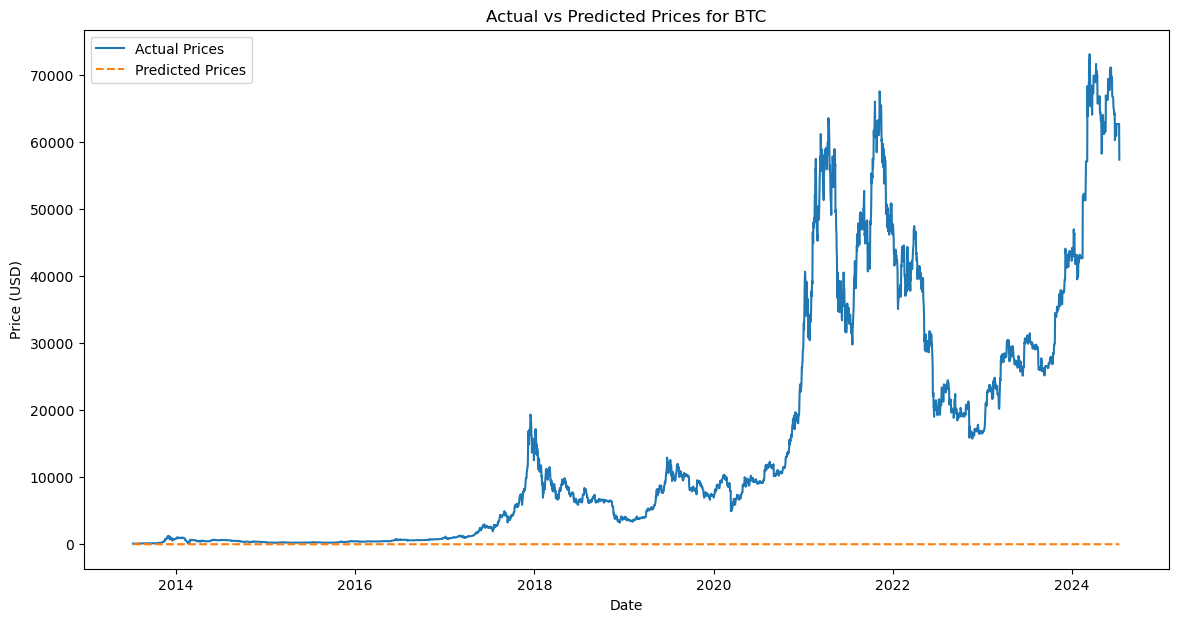

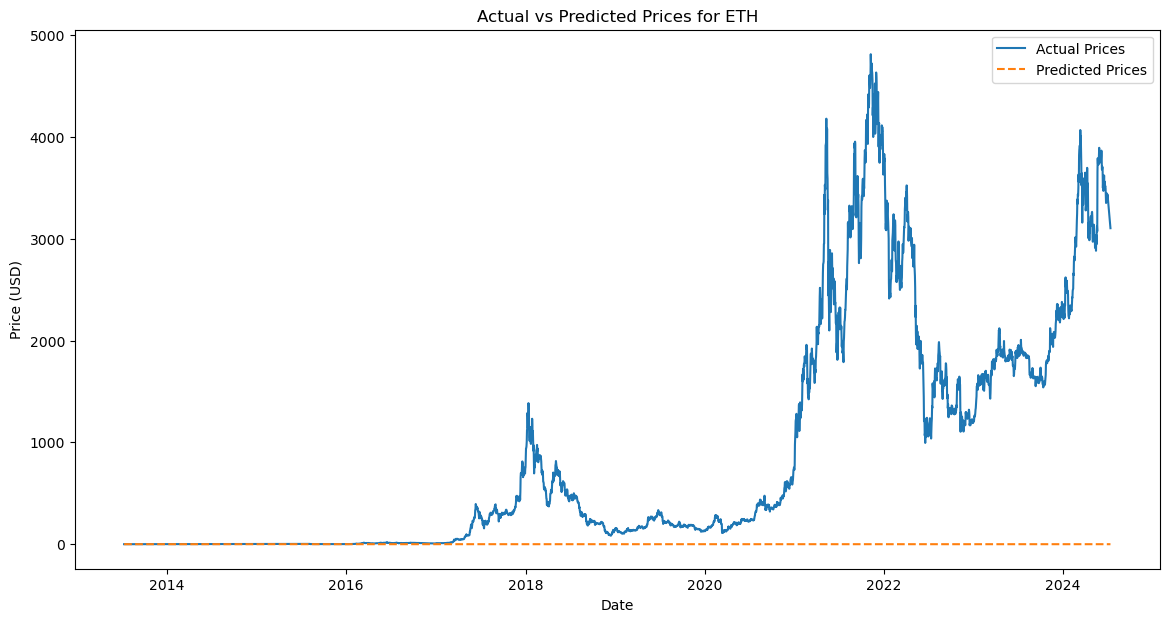

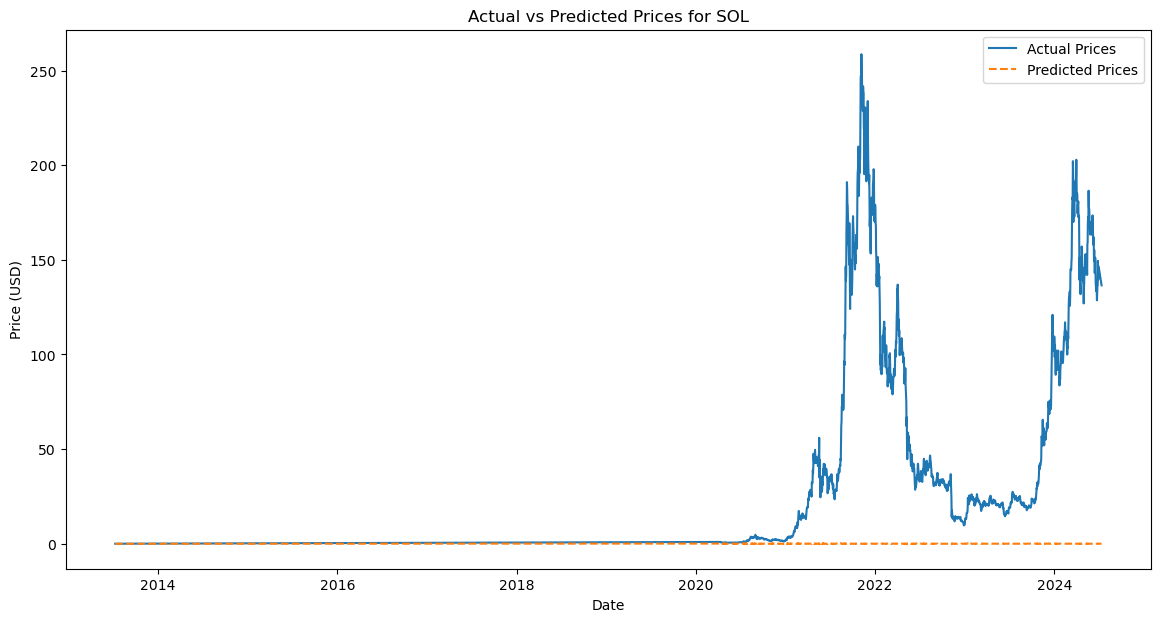

In [5]:
# Cell 5: Plot predictions
for crypto, pred in predictions.items():
    results = crypto_data[crypto][['Close']].copy()
    results['Predictions'] = pred
    
    plt.figure(figsize=(14, 7))
    plt.plot(results.index, results['Close'], label='Actual Prices')
    plt.plot(results.index, results['Predictions'], label='Predicted Prices', linestyle='--')
    plt.title(f'Actual vs Predicted Prices for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
